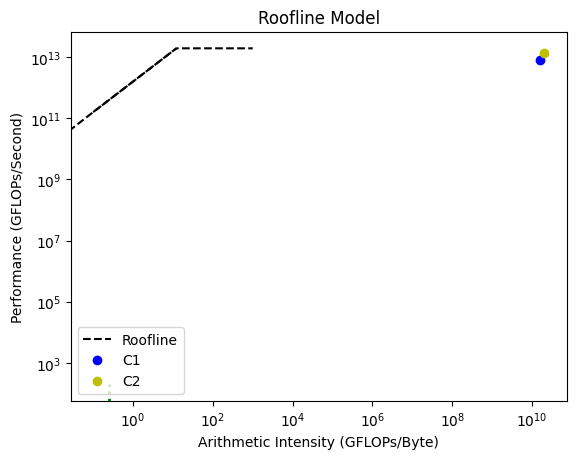

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define roofline model parameters
peak_perf =  19.5 * 10**12 # Maximum achievable performance in FLOPs per second
mem_bandwidth = 1.6 * 10**12  # Memory bandwidth in GB/s

# Define performance and arithmetic intensity ranges
perf_range = np.linspace(0, peak_perf, 100)
ai_range = perf_range / mem_bandwidth

def roofline_model(x, peak_perf, mem_bandwidth):
    return np.minimum(peak_perf, mem_bandwidth * x)

# Generate the data points for the roofline model
x_roof = np.arange(0.1, 1000)
y_roof = np.minimum(peak_perf, mem_bandwidth * x_roof)

# Plot the roofline model
plt.loglog(x_roof, y_roof, color='black', linestyle='--')

# Plot roofline model
plt.plot(ai_range, perf_range, 'k--', label='Roofline')
plt.xlabel('Arithmetic Intensity (GFLOPs/Byte)')
plt.ylabel('Performance (GFLOPs/Second)')
plt.title('Roofline Model')

# Define benchmark data
rfsp = (500, 8.0 * 10**12) # bandwidth and performance values for single precision on V100
rfmp = (700, 14.0 * 10**12) # bandwidth and performance values for mixed precision on V100
benchmarks = [('C1',rfsp[0],rfsp[1]),('C2',rfmp[0],rfmp[1])]

# Plot benchmark points
colors = ['bo','yo']
for i, (label, bw, perf) in enumerate(benchmarks):
    # Check if point overlaps with previous points
    ai = perf/bw
    overlap = False
    for j in range(i):
        if abs(ai - benchmarks[j][2]) < 0.05 and abs(perf - benchmarks[j][1]) < 5:
            overlap = True
            break
    if not overlap:
        plt.plot(ai, perf, colors[i], label=label)

# Add a vertical line at an AI of 0.25
plt.vlines(x=0.25, ymin=0, ymax=200, colors='green', ls=':', lw=2)

# Add legend
plt.legend()

# Show plot
plt.show()
